# Exploring the meff function

*5 December 2019*

Now that we've found our first fitting-based meff function, and that it's not totally universal, let's see what kinds of things the fit depends on.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from helpers import DefaultImage, CustomImage
from helpers import xi_to_pix, x_to_xi
from helpers import PoolResults
from pso import PSOFitCustom

In [2]:
from multiprocessing import Pool

In [3]:
zl = .2
zd = .3
zs = 1.

vmax = .08; vmin = -vmax

In [4]:
d0 = DefaultImage(0, seed=100, zl=zl, zd=zd, zs=zs)

In [5]:
#di = DefaultImage(1, seed=100, zl=zl, zd=zd, zs=zs, near_ring=False)

In [6]:
di = DefaultImage(2, seed=100, zl=zl, zd=zd, zs=zs, near_ring=True)

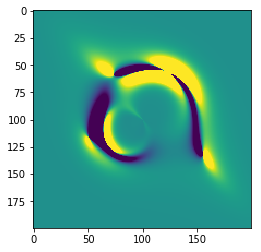

In [7]:
plt.imshow(di.image - d0.image, vmin=vmin, vmax=vmax)

In [8]:
myidx = 1 if zl >= zd else 2 # idx of first interloper in kwargs_lens
di.kwargs_lens[myidx]

{'Rs': 0.22528796282227068,
 'alpha_Rs': 0.007942824217928144,
 'center_x': array(-5.66578464),
 'center_y': array(2.90852685),
 'r_trunc': 4.505759256445414}

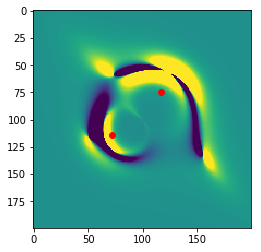

In [9]:
pixsize=0.2
pixnum=200
myidx = 1 if zl >= zd else 2 # idx of first interloper in kwargs_lens
N = di.N
xpixs = []
ypixs = []
for i in range(N):
    xpixs.append( xi_to_pix(x_to_xi(di.kwargs_lens[myidx+i]['center_x'], zl),zl,pixsize,pixnum) )
    ypixs.append( xi_to_pix(x_to_xi(di.kwargs_lens[myidx+i]['center_y'], zl),zl,pixsize,pixnum) )

plt.imshow(di.image - d0.image, vmin=vmin,vmax=vmax)
plt.scatter(xpixs,ypixs, color='red')
#plt.scatter([ypix],[xpix])
plt.show()

In [10]:
ci = CustomImage([3],[10], zl=zl, zd=zd, zs=zs)

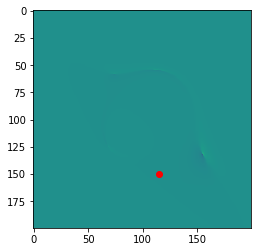

In [11]:
pixsize=0.2
pixnum=200
myidx = 1 if zl >= zd else 2 # idx of first interloper in kwargs_lens
N = ci.N
xpixs = []
ypixs = []
for i in range(N):
    xpixs.append( xi_to_pix(x_to_xi(ci.kwargs_lens[myidx+i]['center_x'], zl),zl,pixsize,pixnum) )
    ypixs.append( xi_to_pix(x_to_xi(ci.kwargs_lens[myidx+i]['center_y'], zl),zl,pixsize,pixnum) )

plt.imshow(ci.image - d0.image, vmin=vmin,vmax=vmax)
plt.scatter(xpixs,ypixs, color='red')
#plt.scatter([ypix],[xpix])
plt.show()

In [12]:
#pfc = PSOFitCustom([3],[10], zd=zd, zl=zl, zs=zs)

In [13]:
# plt.plot(pfc.cost_history)
# plt.gca().set_yscale('log')

In [14]:
# plt.imshow(pfc.pso_img - pfc.image, vmin=vmin,vmax=vmax)

In [15]:
#pfc.pos

See how the cost changes as a function of $(x,y)$ position!

In [16]:
zd, zl, zs

(0.3, 0.2, 1.0)

In [17]:
%%time

def fit_func(i, xpos_list, ypos_list, zd):
    '''
    Helper function for multiprocessing.Pool
    
    (note: zl and zs are set globally, but zd is the function argument)
    '''
    print('Running job', i)
    ans = PSOFitCustom(xpos_list=xpos_list, ypos_list=ypos_list,zd=zd,zl=zl,zs=zs,
                      numiter=200)
    return i, ans

xposll = [[-11],[-10],[-9], [-8], [-7], [-6], [-5]]
yposll = [[0]] * 7
zds    = [.3] * 7
#assert(len(xposll) == len(yposll) == len(zds))

pr = PoolResults(fit_func, [xposll, yposll, zds])#[xposll, yposll, zds])

# ncores = 4

# cl = CallbackList(len(zds))

# with Pool(ncores) as pool:
#     p_list = []
#     for i,(xposl, yposl, zd) in enumerate(zip(xposll,yposll,zds)):
#         p = pool.apply_async(fit_func, args=(i,xposl,yposl,zd), callback=cl.callback)
#         p_list.append(p)
        
#     for p in p_list:
#         p.wait()
        
#     for p in p_list:
#         p.get()
    

Running job 1
Running job 3
Running job 4
Running job 0
Running job 2
Running job 6
Running job 5


2019-12-12 12:37:30,684 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:37:30,675 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-12 12:37:30,677 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:37:30,697 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:37:30,682 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-12 12:37:30,704 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-12 12:37:30,725 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w'

CPU times: user 4.26 s, sys: 1.46 s, total: 5.72 s
Wall time: 12min 45s


In [18]:
xposll = [[-4],[-3],[-2], [-1], [0], [1], [2]]
yposll = [[0]] * 7
zds    = [.3] * 7
#assert(len(xposll) == len(yposll) == len(zds))

pr.run([xposll, yposll, zds])#[xposll, yposll, zds])

Running job 10
Running job 11
Running job 8
Running job 12
Running job 9
Running job 7
Running job 13


2019-12-12 12:50:16,493 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-12 12:50:16,500 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-12 12:50:16,505 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:50:16,518 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:50:16,529 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:50:16,536 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/2002019-12-12 12:50:16,578 - pyswarms.single.global_best - 

In [19]:
pr.results

{0: <pso.PSOFitCustom at 0x7f6fab2a8a58>,
 1: <pso.PSOFitCustom at 0x7f6fab2a3b00>,
 2: <pso.PSOFitCustom at 0x7f6fab29e0f0>,
 3: <pso.PSOFitCustom at 0x7f6fab298fd0>,
 4: <pso.PSOFitCustom at 0x7f6fab2a3080>,
 5: <pso.PSOFitCustom at 0x7f6fab298f28>,
 6: <pso.PSOFitCustom at 0x7f6fab29e1d0>,
 7: <pso.PSOFitCustom at 0x7f6fab2b3f60>,
 8: <pso.PSOFitCustom at 0x7f6fab2a88d0>,
 9: <pso.PSOFitCustom at 0x7f6fab2b5f60>,
 10: <pso.PSOFitCustom at 0x7f6fe5946eb8>,
 11: <pso.PSOFitCustom at 0x7f6fab312a58>,
 12: <pso.PSOFitCustom at 0x7f6fab2adda0>,
 13: <pso.PSOFitCustom at 0x7f6fe5946c88>}

In [20]:
list(zip(*pr.args_list))

[([-11], [0], 0.3),
 ([-10], [0], 0.3),
 ([-9], [0], 0.3),
 ([-8], [0], 0.3),
 ([-7], [0], 0.3),
 ([-6], [0], 0.3),
 ([-5], [0], 0.3),
 ([-4], [0], 0.3),
 ([-3], [0], 0.3),
 ([-2], [0], 0.3),
 ([-1], [0], 0.3),
 ([0], [0], 0.3),
 ([1], [0], 0.3),
 ([2], [0], 0.3)]

In [21]:
from helpers import get_mass_back

In [22]:
results_list = pr.get_results_list()

In [23]:
len(results_list)

14

0.0002581049621503196


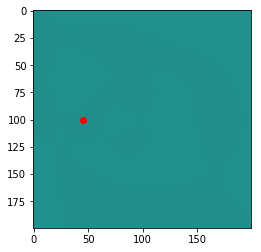

0.0003801373712685104


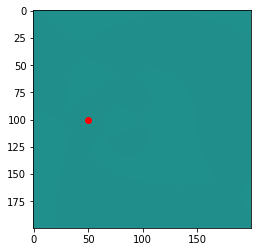

0.0003363828710756453


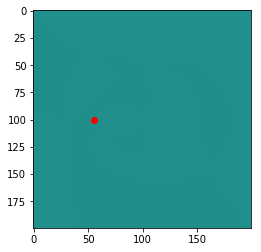

0.000332643406750014


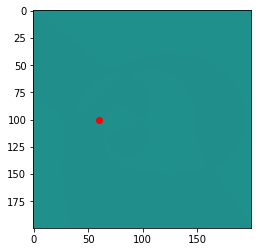

0.0006117103969150347


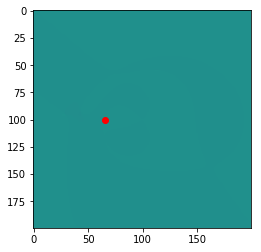

0.0006846943495500261


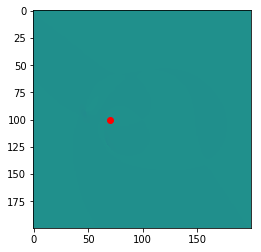

0.0009879679410888015


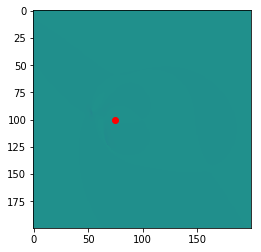

0.001469109273618926


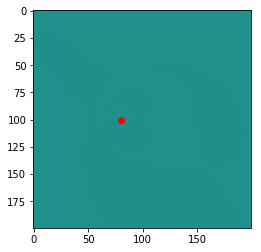

0.0032742585672623325


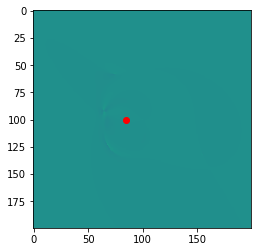

0.005132426254382112


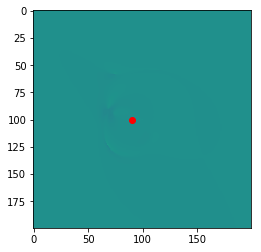

0.0032207804218742217


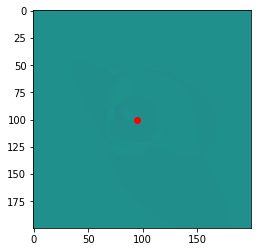

0.002472710340547331


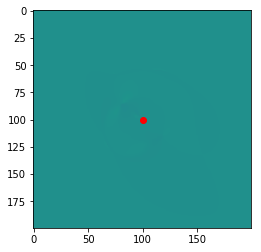

0.0019381435688636962


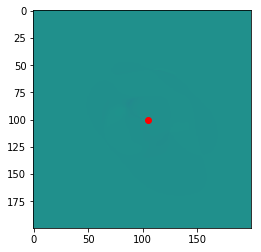

0.0014779966846080966


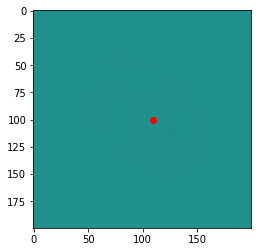

In [24]:
for i, pfc in enumerate(pr.get_results_list()):
    plt.imshow(pfc.pso_img - pfc.image, vmin=vmin,vmax=vmax)
    plt.scatter(pfc.image_obj.plot_xpixs, pfc.image_obj.plot_ypixs, color='red')
    print(pfc.cost)
    plt.show()

In [25]:
# pr.results.items()

# max(pr.results.keys())

# results_list = [None] * 6

# results_list

In [26]:
pr.args_list

[[[-11],
  [-10],
  [-9],
  [-8],
  [-7],
  [-6],
  [-5],
  [-4],
  [-3],
  [-2],
  [-1],
  [0],
  [1],
  [2]],
 [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]

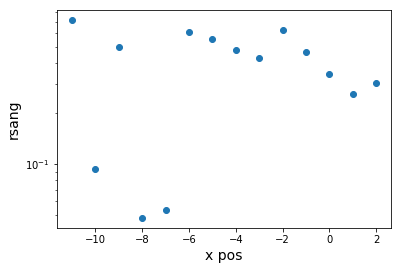

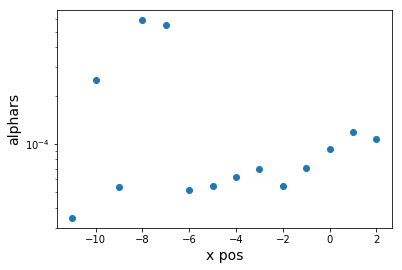

In [27]:
plt.plot([xs[0] for xs in pr.args_list[0]], [10**pf.pos[0] for pf in results_list], 'o')

#plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel('x pos', size=14)
plt.ylabel('rsang', size=14)
plt.gca().set_yscale('log')
plt.show()

plt.plot([xs[0] for xs in pr.args_list[0]], [10**pf.pos[1] for pf in results_list], 'o')
plt.xlabel('x pos', size=14)
plt.ylabel('alphars', size=14)
plt.gca().set_yscale('log')
plt.show()


In [28]:
masses = np.array([get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs)
                  for zd, pf in zip(pr.args_list[2], results_list)])

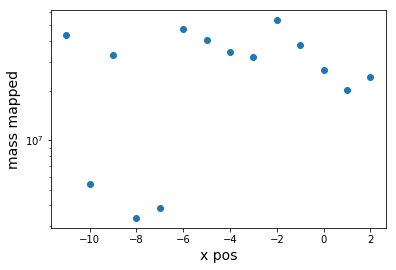

In [29]:
plt.plot([xs[0] for xs in pr.args_list[0]], masses, 'o')
plt.xlabel('x pos', size=14)
plt.ylabel('mass mapped', size=14)
plt.gca().set_yscale('log')
plt.show()

In [30]:
pr

PoolResults{0: <pso.PSOFitCustom object at 0x7f6fab2a8a58>, 1: <pso.PSOFitCustom object at 0x7f6fab2a3b00>, 2: <pso.PSOFitCustom object at 0x7f6fab29e0f0>, 3: <pso.PSOFitCustom object at 0x7f6fab298fd0>, 4: <pso.PSOFitCustom object at 0x7f6fab2a3080>, 5: <pso.PSOFitCustom object at 0x7f6fab298f28>, 6: <pso.PSOFitCustom object at 0x7f6fab29e1d0>, 7: <pso.PSOFitCustom object at 0x7f6fab2b3f60>, 8: <pso.PSOFitCustom object at 0x7f6fab2a88d0>, 9: <pso.PSOFitCustom object at 0x7f6fab2b5f60>, 10: <pso.PSOFitCustom object at 0x7f6fe5946eb8>, 11: <pso.PSOFitCustom object at 0x7f6fab312a58>, 12: <pso.PSOFitCustom object at 0x7f6fab2adda0>, 13: <pso.PSOFitCustom object at 0x7f6fe5946c88>}

In [31]:
import pickle

In [32]:
# with open('pr_zd3_m1e9.p', 'wb') as f:
#     pickle.dump(pr,f)